### Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
data = pd.read_csv('datasets/non_linear.csv')

def generate_degrees(data, degree):
    return np.array([data**n for n in range(1, degree+1)]).T

degree = 8
X = generate_degrees(data['x_train'], degree)
y = data['y_train']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2, random_state=27)

In [7]:
model_ridge = Ridge(alpha=0.8).fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

model_lasso = Lasso(alpha=0.8).fit(X_train, y_train)
y_pred_Lasso = model_lasso.predict(X_test)

C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.264e+00, tolerance: 2.447e-03
  model = cd_fast.enet_coordinate_descent(


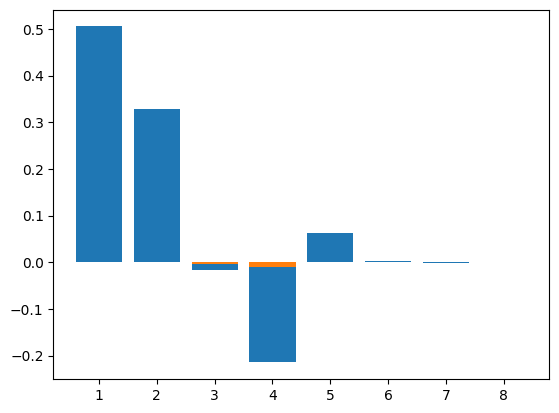

In [8]:
plt.bar(range(1,9), model_ridge.coef_)
plt.bar(range(1,9), model_lasso.coef_)
plt.show()

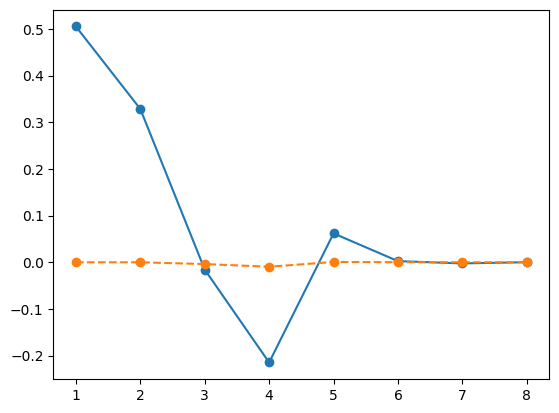

In [9]:
plt.plot(range(1,9), model_ridge.coef_, '-o')
plt.plot(range(1,9), model_lasso.coef_, '--o')
plt.show()

### Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

boston_dataset = pd.read_csv(
    'https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/sklearn/datasets/data/boston_house_prices.csv', 
    sep=',')
boston_dataset.columns = boston_dataset.loc[0,:]
boston_dataset = boston_dataset.drop(0)

X = boston_dataset.drop('MEDV', axis=1)
y = boston_dataset['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [2]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error

sgd_model = SGDRegressor().fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'r2-score = {r2}\nMSE = {mse}\nN iteration = {sgd_model.n_iter_}')

r2-score = -1.5460199103349133e+26
MSE = 1.6168391089005967e+28
N iteration = 91


In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('datasets/non_linear.csv')

def generate_degrees(data, degree):
    return np.array([data**n for n in range(1, degree+1)]).T

degree = 5
X = generate_degrees(data['x_train'], degree)
y = data['y_train']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2, random_state=27)

sgd_model = SGDRegressor(alpha=0.9).fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'r2-score = {r2}\n     MSE = {mse}\n  N iter = {sgd_model.n_iter_}')

r2-score = -9.261426654193188e+32
     MSE = 6.793644102337184e+32
  N iter = 19


Что-то тут не так... потом разберемся... возможно
1) Очень большие значения ошибок
2) Нестабильные вычисления (при каждом новом запуске кода значения ошибок сильно меняются). Это обусловлено наличием больших выбросов в исходном датасете. Необходимо нормализовать данные

Найдем наиболее коррелирующие фичи с таргетом и на них обучим модель

<Axes: xlabel='0', ylabel='0'>

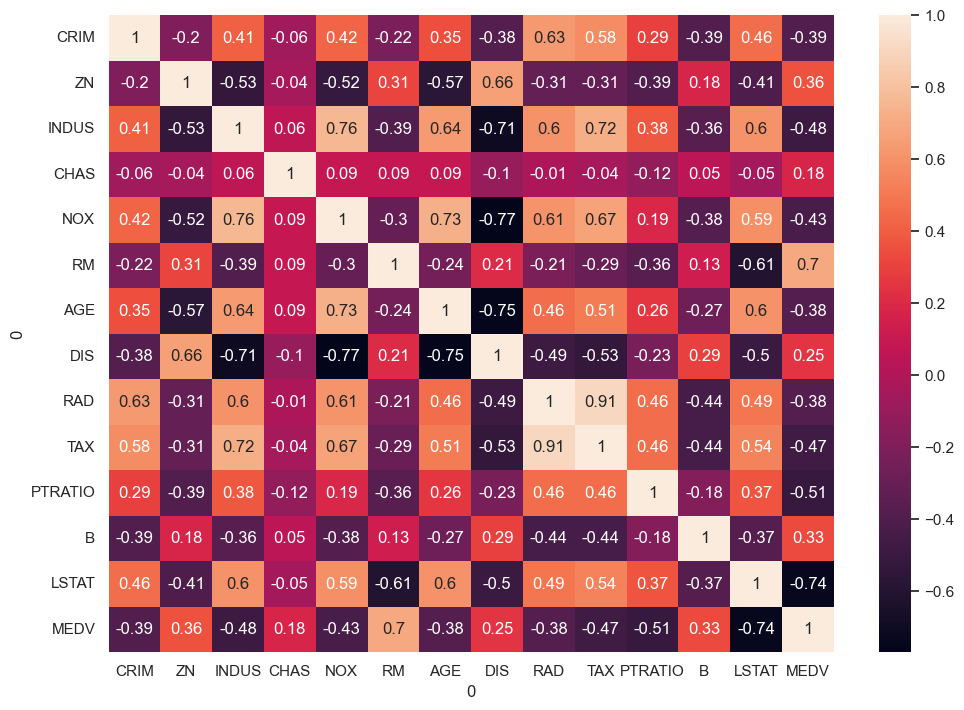

In [4]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
correlation = boston_dataset.corr(numeric_only=False).round(2)
sns.heatmap(correlation, annot=True)

Таргет MEDV сильнее коррелирует с фичами RM и LSTAT

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error

X = pd.DataFrame([boston_dataset['RM'], boston_dataset['LSTAT']]).T
y = boston_dataset['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

sgd_model = SGDRegressor().fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'BEFORE normalization:\nr2-score = {r2}\n     MSE = {mse}\n  N iter = {sgd_model.n_iter_}')

BEFORE normalization:
r2-score = 0.6312500522978487
     MSE = 33.409551946629364
  N iter = 10


In [14]:
from sklearn.preprocessing import StandardScaler

y = np.ravel(y)
X_trans = StandardScaler().fit_transform(X)
y_trans = StandardScaler().fit_transform(y[:,np.newaxis])

X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.2, random_state=27)

sgd_model = SGDRegressor().fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'AFTER normalization:\nr2-score = {r2:.4}\n     MSE = {mse}\n  N iter = {sgd_model.n_iter_}')

AFTER normalization:
r2-score = 0.6227
     MSE = 0.4048998006327581
  N iter = 8


C:\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


После нормализации датасета значения метрик стали стабильны. Но величина их осталась невелика...

### Домашняя работа

**Задача высокого уровня** В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_0)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_k)& k\neq 0 \\
\end{array}
\right.
$$